In [1]:
#Suv car purchase prediction using logistic regression and decision tree ml model - by vinayak Bhosale

In [2]:
#importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the data set

In [2]:
df = pd.read_csv("C:\\vinayak's folder\\data set\\Suv-Car-purchase-prediction-master\\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
#checking the information about the data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#checking if any values are null

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#dropping user id because it may cause issues with model to predict and also the column is irrelevant

In [7]:
df.drop("User ID",axis=1,inplace = True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
#gender column is object type we need to convert it to integer type

In [10]:
gen = pd.get_dummies(df["Gender"],drop_first = True)

In [8]:
#joining the new column

In [14]:
df = pd.concat([df,gen],axis=1)

In [16]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [9]:
#calling describe method on the data frame

In [17]:
df.describe()

,Age,EstimatedSalary,Purchased,Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [10]:
#checking the correlation between the columns

In [18]:
df.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


In [11]:
#plotting the correlation

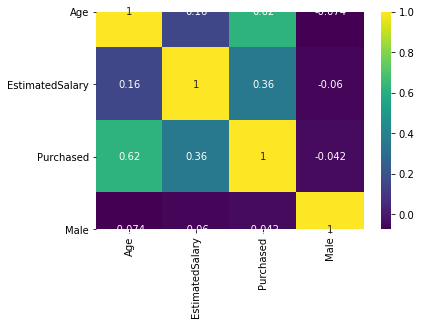

In [21]:
plt.plot(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [22]:
df.head(2)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1


In [12]:
#splitting the data frame into independent and dependent variables

In [23]:
x = df.drop("Purchased",axis=1)

In [24]:
y = df["Purchased"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [27]:
df["Purchased"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

In [28]:
df["Purchased"].tail(10)

390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, dtype: int64

In [13]:
#building the model

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [14]:
#training the model

In [30]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#making predictions

In [31]:
predictions = model.predict(x_test)

In [16]:
#checking the predictions

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
print(confusion_matrix(predictions,y_test))
print("\n")
print(classification_report(predictions,y_test))
print("\n")
print(accuracy_score(predictions,y_test))

[[80 40]
 [ 0  0]]


              precision    recall  f1-score   support

           0       1.00      0.67      0.80       120
           1       0.00      0.00      0.00         0

    accuracy                           0.67       120
   macro avg       0.50      0.33      0.40       120
weighted avg       1.00      0.67      0.80       120



0.6666666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
#the accuracy is 66.66% which is low lets see if we imporve the accuracy by uing decision tree model

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [18]:
#building the decision tree model and training

In [35]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
#making predictions

In [37]:
predict1 = dt_model.predict(x_test)

In [20]:
#checking the accuracy

In [38]:
print(confusion_matrix(predict1,y_test))
print("\n")
print(classification_report(predict1,y_test))
print("\n")
print(accuracy_score(predict1,y_test))

[[70  4]
 [10 36]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.91        74
           1       0.90      0.78      0.84        46

    accuracy                           0.88       120
   macro avg       0.89      0.86      0.87       120
weighted avg       0.88      0.88      0.88       120



0.8833333333333333


In [21]:
#the accuracy has been improved from 66.66% to 88.33% so our decision tree model did pretty good 